In [85]:
import numpy as np
import scipy.stats as sps
from glob import glob
import matplotlib.pyplot as plt
import uproot as ur
import ROOT as rt
import ROOT.RooFit as rf
from scipy.special import erf
import sys
sys.path.append('../lib')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, SetMaxToMaxHist, make_ratio_plot
from cebefo_style import Set_2D_colz_graphics
from progressBar import ProgressBar

from analysis_utilities import drawOnCMSCanvas, extarct, extarct_multiple, createSel

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

donotdelete = []

ImportError: No module named progressBar

In [2]:
import operator
ops = {'>': operator.gt, '<': operator.lt, }

In [3]:
rt.gErrorIgnoreLevel = rt.kError
rt.RooMsgService.instance().setGlobalKillBelow(rt.RooFit.ERROR)

In [4]:
m_D0 = 1.86483 #1e-3*Particle.from_string('D0').mass
print m_D0
m_Dst = 2.01026 #1e-3*Particle.from_string('D*+').mass
print m_Dst
m_B0 = 5.27963 #1e-3*Particle.from_string('B0').mass
print m_B0
m_pi = 0.13957018 #1e-3*Particle.from_string('pi+').mass
print 'mD* - mD0 =', m_Dst - m_D0

1.86483
2.01026
5.27963
mD* - mD0 = 0.14543


In [5]:
cl = rt.TLine()
cl.SetLineColor(6)
cl.SetLineStyle(9)
cl.SetLineWidth(2)

In [10]:
directory = '../data/cmsMC_private/BPH_Tag-Mu_Probe-B0_KDmst-pD0bar-kp_13TeV-pythia8_Hardbbbar_PTFilter5_0p0-evtgen_SVS_PU0_10-2-3/jobs_B2DstK'
tMC = ur.open(directory + '/out_CAND_0.root')['outA']['Tevts']
# print tMC.keys(), '\n\n'
branches = tMC.keys()
for b in np.sort(branches):
#     pass
    print b
    
"""
    # branches = [
    # #             'LumiBlock', 
    # #             'MC_B_P', 
    # #             'MC_B_eta', 
    # #             'MC_B_phi',
    # #             'MC_B_pt', 
    # #             'MC_D0_P', 
    # #             'MC_D0_eta', 
    # #             'MC_D0_phi', 
    # #             'MC_D0_pt',
    # #             'MC_Dst_P', 
    # #             'MC_Dst_eta',
    # #             'MC_Dst_phi',
    # #             'MC_Dst_pt',
    #             'MC_Ks_P',
    #             'MC_Ks_eta',
    #             'MC_Ks_phi',
    #             'MC_Ks_pt',
    # #             'MC_pis_P',
    # #             'MC_pis_eta',
    # #             'MC_pis_phi',
    # #             'MC_pis_pt',
    # #             'Run',
    # #             'eventNumber',
    #             'n_B',
    # #             'n_D0',
    #             'n_Dst',
    # #             'n_K',
    #             'n_Ks',
    # #             'n_pi',
    # #             'n_pis',
    #             'trgMu_charge',
    #             'trgMu_eta',
    #             'trgMu_phi',
    #             'trgMu_pt',
    #             'B_E',
    #             'B_P',
    #             'B_eta',
    #             'B_phi',
    #             'B_pt',
    #             'B_pz',
    # #             'D0_E',
    # #             'D0_P',
    # #             'D0_eta',
    # #             'D0_phi',
    # #             'D0_pt',
    # #             'D0_pz',
    #             'Dst_E',
    #             'Dst_P',
    #             'Dst_eta',
    #             'Dst_phi',
    #             'Dst_pt',
    #             'Dst_pz',
    # #             'K_E',
    # #             'K_P',
    # #             'K_eta',
    # #             'K_phi',
    # #             'K_pt',
    # #             'K_pz',
    #             'Ks_E',
    #             'Ks_P',
    #             'Ks_eta',
    #             'Ks_phi',
    #             'Ks_pt',
    #             'Ks_pz',
    # #             'chi2_D0pis',
    #             'chi2_DstK',
    # #             'chi2_kpi',
    # #             'cos_D0pis_vtxMu',
    #             'cos_DstK_vtxBest',
    # #             'cos_kpi_vtxMu',
    # #             'd_vtxD0pis_vtxMu',
    # #             'd_vtxkpi_vtxMu',
    # #             'dca_D0pis_vtxMu',
    # #             'dca_kpi_vtxMu',
    #             'mass_D0pis',
    #             'mass_DstK',
    # #             'mass_kpi',
    # #             'pi_E',
    # #             'pi_P',
    # #             'pi_eta',
    # #             'pi_phi',
    # #             'pi_pt',
    # #             'pi_pz',
    # #             'pis_E',
    # #             'pis_P',
    # #             'pis_eta',
    # #             'pis_phi',
    # #             'pis_pt',
    # #             'pis_pz',
    # #             'sigd_vtxD0pis_vtxMu',
    # #             'sigd_vtxkpi_vtxMu',
    # #             'sigdca_D0pis_vtxMu',
    # #             'sigdca_kpi_vtxMu'
    # ]
"""

B_E
B_P
B_eta
B_phi
B_pt
B_pz
D0_E
D0_P
D0_eta
D0_phi
D0_pt
D0_pz
Dst_E
Dst_P
Dst_eta
Dst_phi
Dst_pt
Dst_pz
K_E
K_P
K_eta
K_phi
K_pt
K_pz
Ks_E
Ks_N_valid_hits
Ks_P
Ks_eta
Ks_norm_chi2
Ks_phi
Ks_pt
Ks_pz
LumiBlock
MC_B_P
MC_B_eta
MC_B_phi
MC_B_pt
MC_D0_P
MC_D0_eta
MC_D0_phi
MC_D0_pt
MC_Dst_P
MC_Dst_eta
MC_Dst_phi
MC_Dst_pt
MC_Ks_P
MC_Ks_eta
MC_Ks_phi
MC_Ks_pt
MC_mu_P
MC_mu_eta
MC_mu_phi
MC_mu_pt
MC_pis_P
MC_pis_eta
MC_pis_phi
MC_pis_pt
Run
chi2_D0pis
chi2_DstK
chi2_DstKs
chi2_Kpi
cos_D0pis_vtxMu
cos_DstK_vtxBest
cos_DstKs_vtxBest
cos_Kpi_vtxMu
d_Ks_PV
d_pis_PV
d_vtxD0pis_vtxMu
d_vtxDstK_vtxBest
d_vtxKpi_vtxMu
dca_D0pis_vtxMu
dca_Kpi_vtxMu
eventNumber
mass_D0pis
mass_DstK
mass_DstKs
mass_Kpi
n_B
n_D0
n_Dst
n_K
n_Ks
n_pi
n_pis
pi_E
pi_P
pi_eta
pi_phi
pi_pt
pi_pz
pis_E
pis_N_valid_hits
pis_P
pis_eta
pis_norm_chi2
pis_phi
pis_pt
pis_pz
sigd_Ks_PV
sigd_pis_PV
sigd_vtxD0pis_vtxMu
sigd_vtxDstK_vtxBest
sigd_vtxKpi_vtxMu
sigdca_D0pis_vtxMu
sigdca_Kpi_vtxMu
trgMu_charge
trgMu_d
trgMu_eta
trgMu_ph

# Preliminary study

In [70]:
tChain = rt.TChain('outA/Tevts')
for fname in glob(directory + '/out_CAND_*[0-9].root'):
    tChain.Add(fname)
print 'N files:', tChain.GetNtrees()
print 'N events:', tChain.GetEntries()

N files: 22
N events: 15417


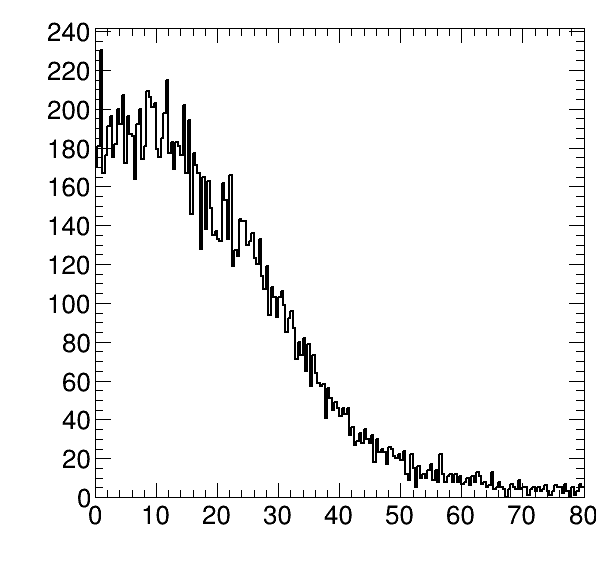

In [71]:
c = rt.TCanvas()
t.Draw('trgMu_sigd>>h(200,0,80)')
c.Draw()

In [ ]:
c = rt.TCanvas()
t.Draw('n_B:trgMu_sigd', '', 'colz')
c.Draw()

# Load data

In [13]:
fn = directory + '/out*.root'
dMC = extarct_multiple(fn, branches=branches)
print 'Number of events:', dMC['n_B'].shape[0]
print 'Number of candidates:', dMC['mass_DstKs'].shape[0]

Number of events: 15417
Number of candidates: 32197


In [14]:
# fn = directory.replace('PU0', 'PU20') + '/out*.root'
# dMC_PU = extarct_multiple(fn, branches=branches)
# print 'Number of events:', dMC_PU['n_B'].shape[0]
# print 'Number of candidates:', dMC_PU['mass_DstK'].shape[0]

# Cuts declaration

In [15]:
cut = {}
# cut['cos_DstK_vtxBest'] = ['>', 0.98]
# cut['chi2_D0pis'] = ['<', 3.84]
# cut['d_vtxkpi_vtxMu'] = ['>', 0.03]
# cut['sigdca_kpi_vtxMu'] = ['>', 2.]

In [19]:
print np.max(dMC['chi2_DstKs'])
sps.chi2.cdf(np.max(dMC['chi2_DstKs']), 1)

6.6348805


0.9899999098544793

In [20]:
sps.chi2.cdf(3.84, 1)

0.9499564787512949

In [21]:
def createSel(d, cut):
    sel = np.ones_like(d[cut.keys[0]], dtype=bool)
    for k, v in cut.iteritems():
        sel = np.logical_and(sel, ops[v[0]](d[k], v[1]) )
    return sel

In [60]:
def delta_R_MC(d, str_p):
    dphi = np.repeat(d['MC_'+str_p+'_phi'], d['n_B'].astype(np.int))-d[str_p+'_phi']
    dphi = np.where(np.abs(dphi)>np.pi, dphi - np.sign(dphi)*2*np.pi, dphi)
    deta = np.repeat(d['MC_'+str_p+'_eta'], d['n_B'].astype(np.int))-d[str_p+'_eta']
    return np.hypot(deta, dphi)

## Studying the triggering muon

In [23]:
dphi = dMC['MC_mu_phi']-dMC['trgMu_phi']
dphi = np.where(np.abs(dphi)>np.pi, dphi - np.sign(dphi)*2*np.pi, dphi)
deta = dMC['MC_mu_eta']-dMC['trgMu_eta']
dR_mu = np.hypot(deta, dphi)

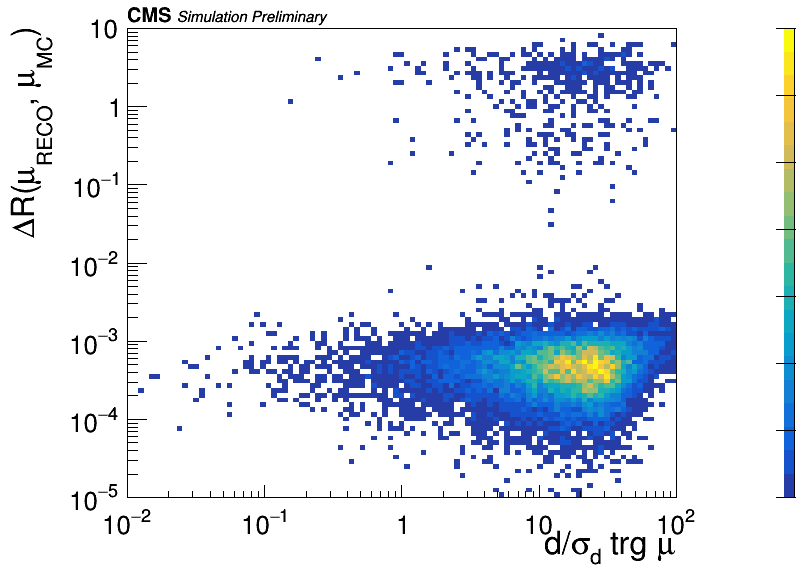

In [28]:
h = create_TH2D(np.column_stack((dMC['trgMu_sigd'], dR_mu)), 
                axis_title=['d/#sigma_{d} trg #mu', '#DeltaR(#mu_{RECO}, #mu_{MC})', 'Candidates'],
                binning=[np.logspace(-2, 2, 100), np.logspace(-5, 1, 100)]
               )
c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()
c.SetLogy()
c.SetLogx()

## D0

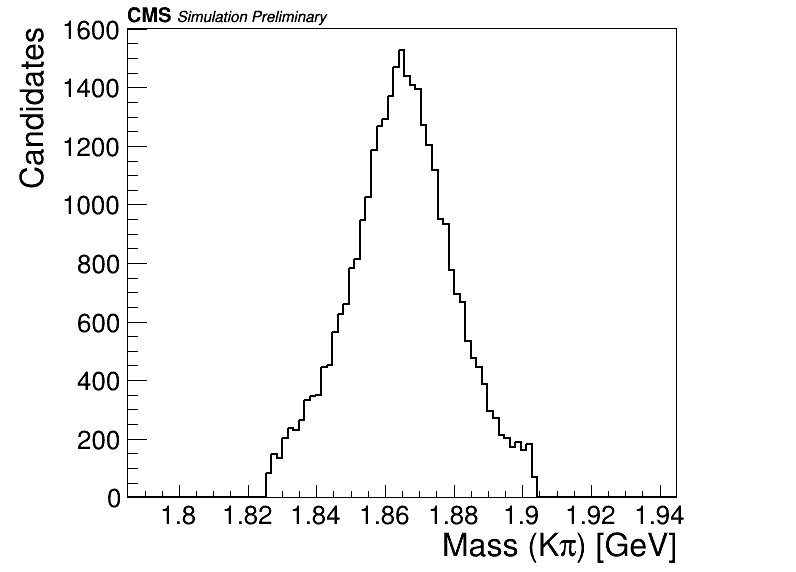

In [37]:
h = create_TH1D(dMC['mass_Kpi'], 
                axis_title=['Mass (K#pi) [GeV]', 'Candidates'],
                binning=np.linspace(m_D0-0.08, m_D0+0.08, 100)
               )
f_fit = rt.TF1('f_fit', '[0] +[1]*exp(pow(x-[2]/[3],2)/2)', 1.82, 1.9)
f_fit.SetParameter(0, )
h.Fit(f_fit)
c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()

## D*

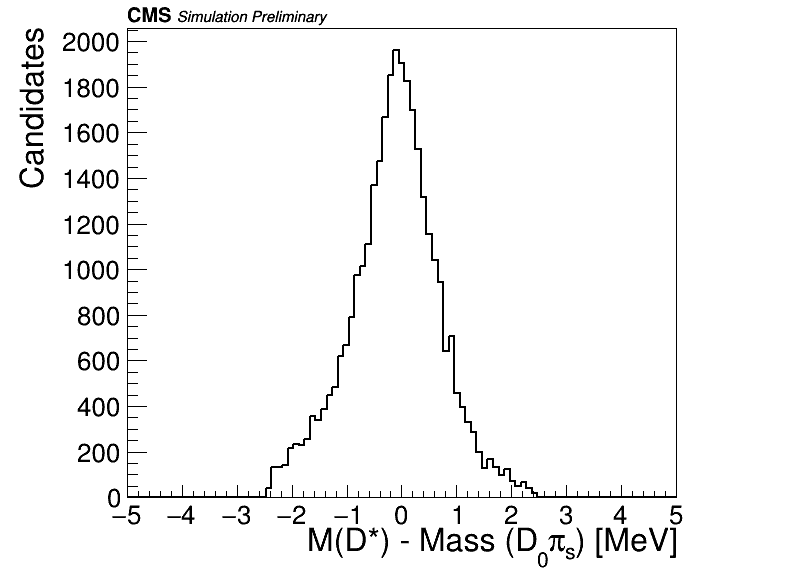

In [51]:
h = create_TH1D(1e3*(m_Dst - dMC['mass_D0pis']), 
                axis_title=['M(D*) - Mass (D_{0}#pi_{s}) [MeV]', 'Candidates'],
                binning=np.linspace(-5, 5, 100)
               )
# f_fit = rt.TF1('f_fit', '[0] +[1]*exp(pow(x-[2]/[3],2)/2)', 1.82, 1.9)
# f_fit.SetParameter(0, )
# h.Fit(f_fit)
c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()

In [68]:
dR_pis = delta_R_MC(dMC, 'pis')
dR_D0 = delta_R_MC(dMC, 'D0')

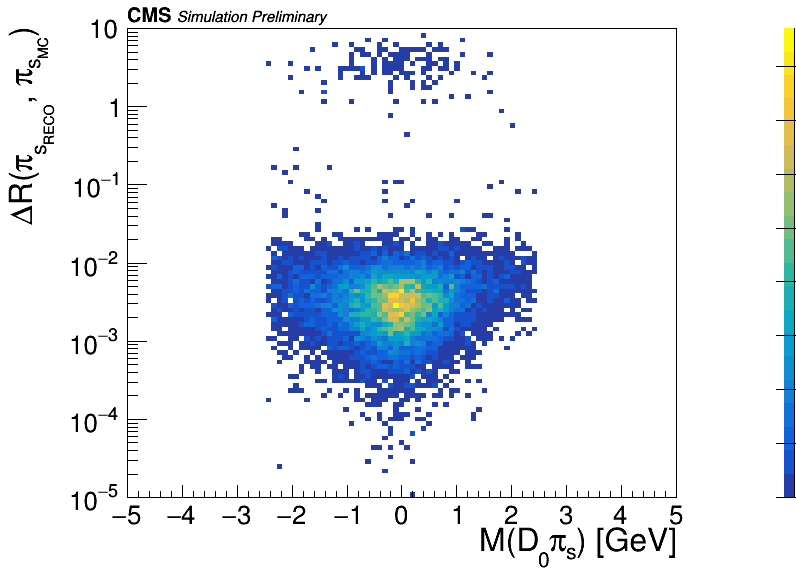

In [67]:
h = create_TH2D(np.column_stack((1e3*(m_Dst - dMC['mass_D0pis']), dR_pis)), 
                axis_title=['M(D_{0}#pi_{s}) [GeV]', '#DeltaR(#pi_{s}_{RECO}, #pi_{s}_{MC})', 'Candidates'],
                binning=[np.linspace(-5, 5, 100), np.logspace(-5, 1, 100)]
               )
c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()
c.SetLogy()

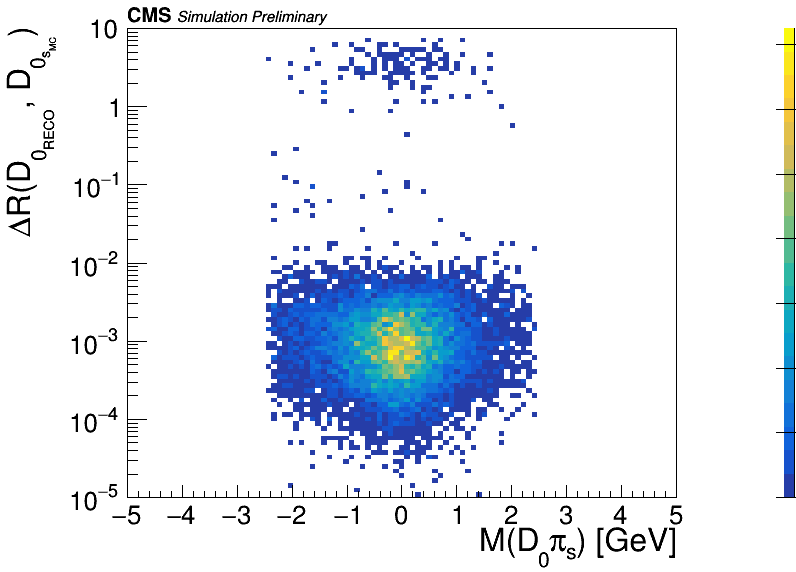

In [69]:
h = create_TH2D(np.column_stack((1e3*(m_Dst - dMC['mass_D0pis']), dR_D0)), 
                axis_title=['M(D_{0}#pi_{s}) [GeV]', '#DeltaR(D_{0}_{RECO}, D_{0}_{s}_{MC})', 'Candidates'],
                binning=[np.linspace(-5, 5, 100), np.logspace(-5, 1, 100)]
               )
c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()
c.SetLogy()

In [96]:
dOut = {'have_true_pis':[], 'N_fake_pis':[], 'have_true_D0':[], 'N_fake_D0':[]}

for i_evt, e in enumerate(tChain):
    pis_pt = []
    for pt in e.pis_pt:
        pis_pt.append(pt)
    pis_pt, idx_pis = np.unique(pis_pt, return_index=True)
    
    dR_pis = []
    for i in idx_pis:
        dphi = e.pis_phi[i] - e.MC_pis_phi
        dphi = np.where(np.abs(dphi)>np.pi, dphi - np.sign(dphi)*2*np.pi, dphi)
        deta = e.pis_eta[i] - e.MC_pis_eta
        dR_pis.append(np.hypot(dphi, deta))
    dOut['N_fake_pis'].append(np.sum(np.array(dR_pis) > 0.05))
    dOut['have_true_pis'].append(np.sum(np.array(dR_pis) < 0.05) > 0)
    
    D0_pt = []
    for pt in e.D0_pt:
        D0_pt.append(pt)
    D0_pt, idx_D0 = np.unique(D0_pt, return_index=True)
    
    dR_D0 = []
    for i in idx_D0:
        dphi = e.D0_phi[i] - e.MC_D0_phi
        dphi = np.where(np.abs(dphi)>np.pi, dphi - np.sign(dphi)*2*np.pi, dphi)
        deta = e.D0_eta[i] - e.MC_D0_eta
        dR_D0.append(np.hypot(dphi, deta))
    dOut['N_fake_D0'].append(np.sum(np.array(dR_D0) > 0.05))
    dOut['have_true_D0'].append(np.sum(np.array(dR_D0) < 0.05) > 0)
    
for k in dOut.keys():
    dOut[k] = np.array(dOut[k])

In [97]:
dOut['N_fake_pis'].shape

(15417,)

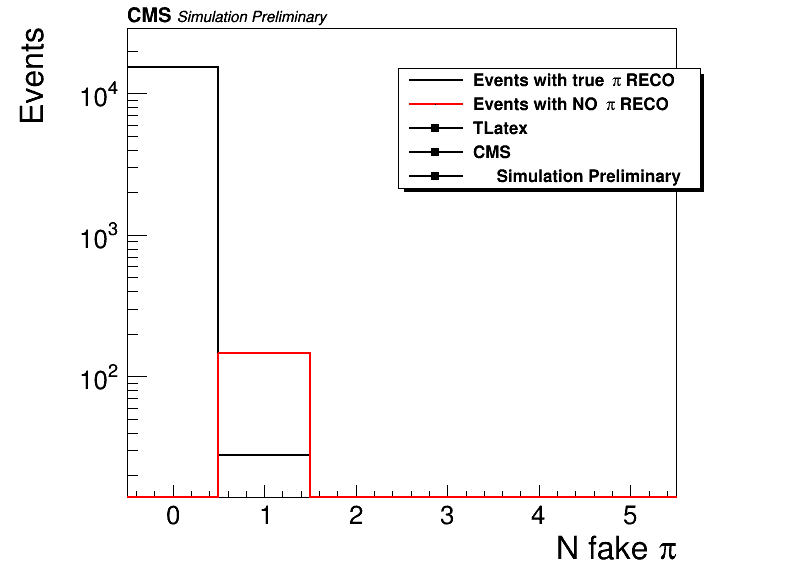

In [110]:
h = create_TH1D(dOut['N_fake_pis'][dOut['have_true_pis']], 
                title='Events with true #pi RECO',
                axis_title=['N fake #pi', 'Events'],
                binning=[6, -0.5, 5.5]
               )
                                   
h2 = create_TH1D( dOut['N_fake_pis'][np.logical_not(dOut['have_true_pis'])], 
                 title='Events with NO #pi RECO',
                axis_title=['N fake #pi', 'Events'],
                binning=h.binning
               )
h2.SetLineColor(2)
c = drawOnCMSCanvas(CMS_lumi, [h, h2], 'same')
c.SetRightMargin(0.15)
c.Draw()


l = c.BuildLegend(0.8,0.9,0.8,0.9)
l.Draw()
c.SetLogy()

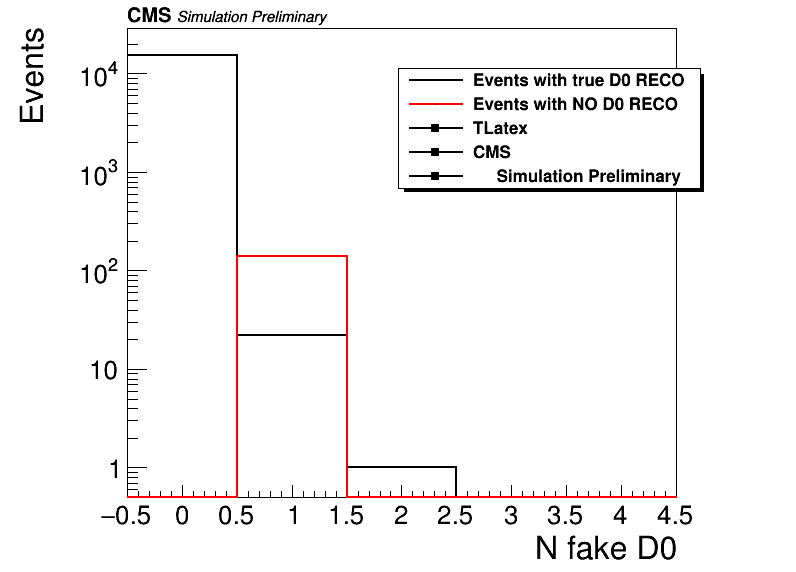

In [113]:
h = create_TH1D(dOut['N_fake_D0'][dOut['have_true_D0']], 
                title='Events with true D0 RECO',
                axis_title=['N fake D0', 'Events'],
                binning=[5, -0.5, 4.5]
               )
                                   
h2 = create_TH1D( dOut['N_fake_D0'][np.logical_not(dOut['have_true_D0'])], 
                 title='Events with NO D0 RECO',
                axis_title=['N fake D0', 'Events'],
                binning=h.binning
               )
h2.SetLineColor(2)
c = drawOnCMSCanvas(CMS_lumi, [h, h2], 'same')
c.SetRightMargin(0.15)
c.Draw()


l = c.BuildLegend(0.8,0.9,0.8,0.9)
l.Draw()
c.SetLogy()

## B

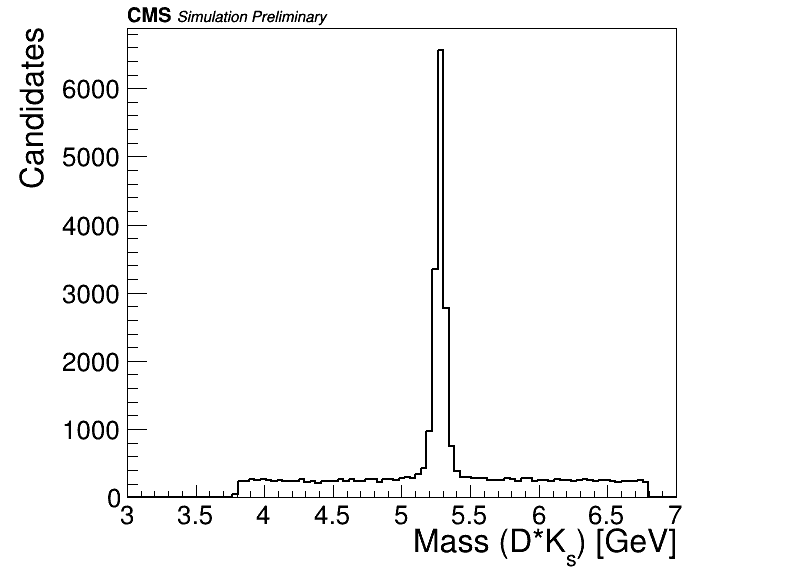

In [106]:
h = create_TH1D(dMC['mass_DstKs'], 
                axis_title=['Mass (D*K_{s}) [GeV]', 'Candidates'],
                binning=np.linspace(3,7, 100)
               )

c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()

In [118]:
dR_Dst = delta_R_MC(dMC, 'Dst')
dR_Ks = delta_R_MC(dMC, 'Ks')

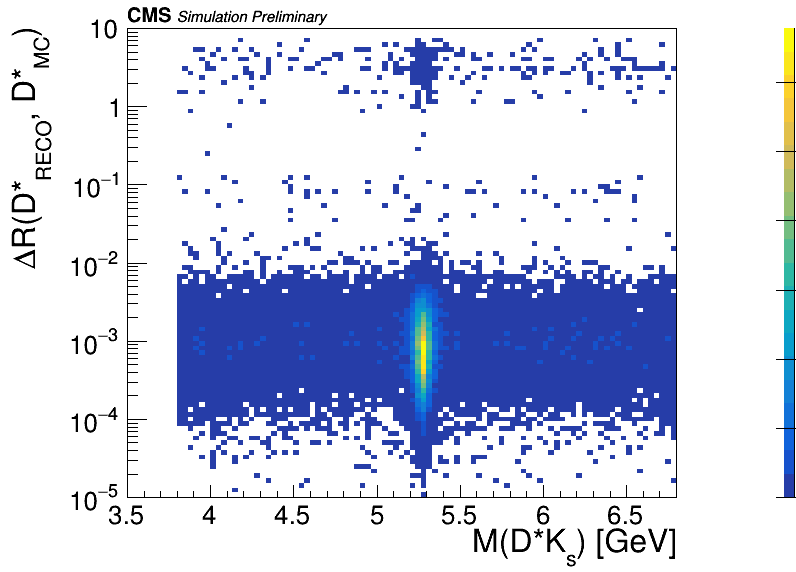

In [122]:
h = create_TH2D(np.column_stack((dMC['mass_DstKs'], dR_Dst)), 
                axis_title=['M(D*K_{s}) [GeV]', '#DeltaR(D*_{RECO}, D*_{MC})', 'Candidates'],
                binning=[np.linspace(3.5, 6.8, 100), np.logspace(-5, 1, 100)]
               )
c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()
c.SetLogy()

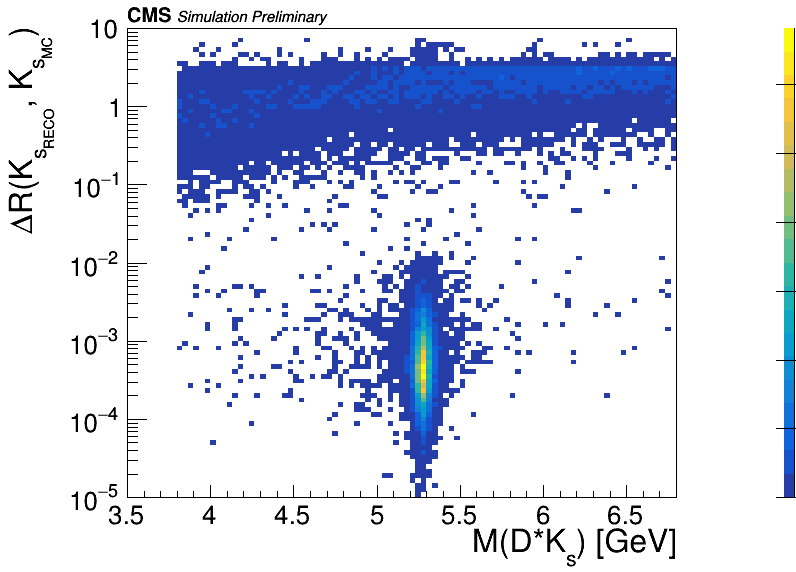

In [123]:
h = create_TH2D(np.column_stack((dMC['mass_DstKs'], dR_Ks)), 
                axis_title=['M(D*K_{s}) [GeV]', '#DeltaR(K_{s}_{RECO}, K_{s}_{MC})', 'Candidates'],
                binning=[np.linspace(3.5, 6.8, 100), np.logspace(-5, 1, 100)]
               )
c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()
c.SetLogy()

In [114]:
dOut = {'have_true_Dst':[], 'N_fake_Dst':[], 'have_true_Ks':[], 'N_fake_Ks':[]}

for i_evt, e in enumerate(tChain):
    Dst_pt = []
    for pt in e.Dst_pt:
        Dst_pt.append(pt)
    Dst_pt, idx_Dst = np.unique(Dst_pt, return_index=True)
    
    dR_Dst = []
    for i in idx_Dst:
        dphi = e.Dst_phi[i] - e.MC_Dst_phi
        dphi = np.where(np.abs(dphi)>np.pi, dphi - np.sign(dphi)*2*np.pi, dphi)
        deta = e.Dst_eta[i] - e.MC_Dst_eta
        dR_Dst.append(np.hypot(dphi, deta))
    dOut['N_fake_Dst'].append(np.sum(np.array(dR_Dst) > 0.05))
    dOut['have_true_Dst'].append(np.sum(np.array(dR_Dst) < 0.05) > 0)
    
    Ks_pt = []
    for pt in e.Ks_pt:
        Ks_pt.append(pt)
    Ks_pt, idx_Ks = np.unique(Ks_pt, return_index=True)
    
    dR_Ks = []
    for i in idx_Ks:
        dphi = e.Ks_phi[i] - e.MC_Ks_phi
        dphi = np.where(np.abs(dphi)>np.pi, dphi - np.sign(dphi)*2*np.pi, dphi)
        deta = e.Ks_eta[i] - e.MC_Ks_eta
        dR_Ks.append(np.hypot(dphi, deta))
    dOut['N_fake_Ks'].append(np.sum(np.array(dR_Ks) > 0.05))
    dOut['have_true_Ks'].append(np.sum(np.array(dR_Ks) < 0.05) > 0)
    
for k in dOut.keys():
    dOut[k] = np.array(dOut[k])

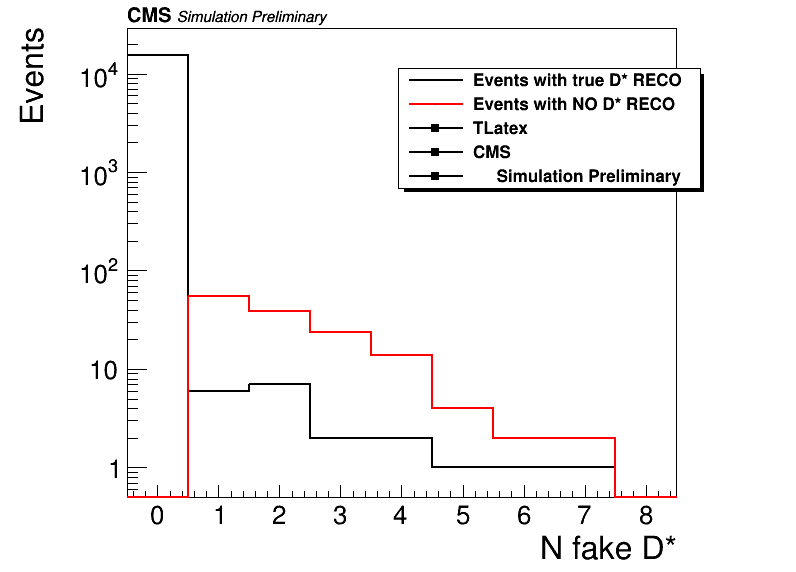

In [117]:
h = create_TH1D(dOut['N_fake_Dst'][dOut['have_true_Dst']], 
                title='Events with true D* RECO',
                axis_title=['N fake D*', 'Events'],
                binning=[9, -0.5, 8.5]
               )
                                   
h2 = create_TH1D( dOut['N_fake_Dst'][np.logical_not(dOut['have_true_Dst'])], 
                 title='Events with NO D* RECO',
                axis_title=['N fake D*', 'Events'],
                binning=h.binning
               )
h2.SetLineColor(2)
c = drawOnCMSCanvas(CMS_lumi, [h, h2], 'same')
c.SetRightMargin(0.15)
c.Draw()


l = c.BuildLegend(0.8,0.9,0.8,0.9)
l.Draw()
c.SetLogy()

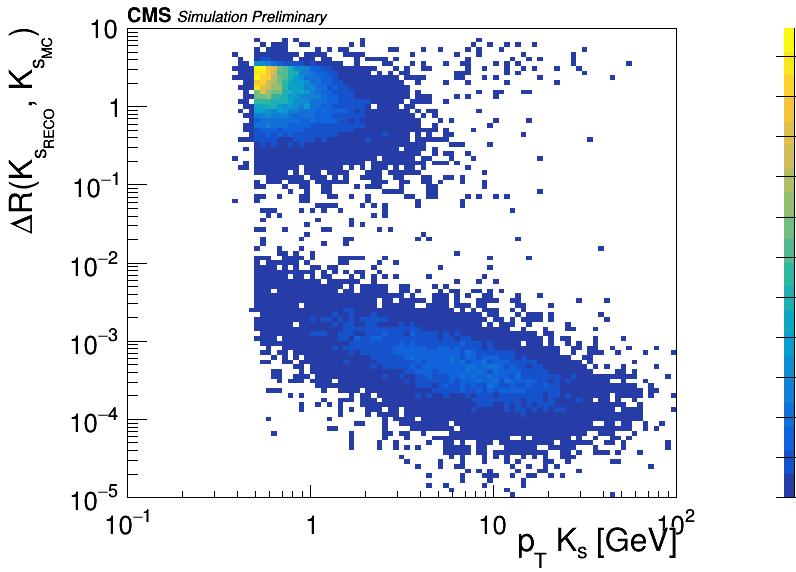

In [125]:
h = create_TH2D(np.column_stack((dMC['Ks_pt'], dR_Ks)), 
                axis_title=['p_{T} K_{s} [GeV]', '#DeltaR(K_{s}_{RECO}, K_{s}_{MC})', 'Candidates'],
                binning=[np.logspace(-1, 2, 100), np.logspace(-5, 1, 100)]
               )
c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()
c.SetLogy()
c.SetLogx()

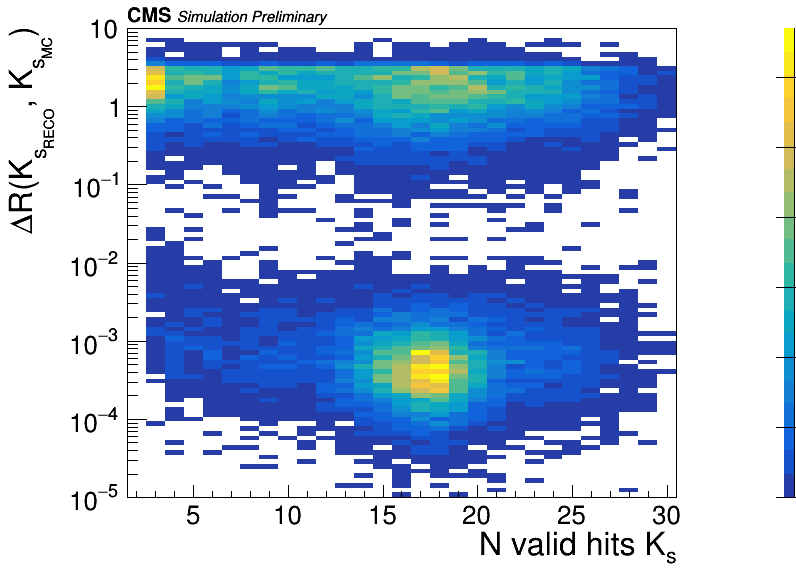

In [145]:
h = create_TH2D(np.column_stack((dMC['Ks_N_valid_hits'], dR_Ks)), 
                axis_title=['N valid hits K_{s}', '#DeltaR(K_{s}_{RECO}, K_{s}_{MC})', 'Candidates'],
                binning=[np.linspace(1.5, 30.5, 30), np.logspace(-5, 1, 100)]
               )
c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()
c.SetLogy()

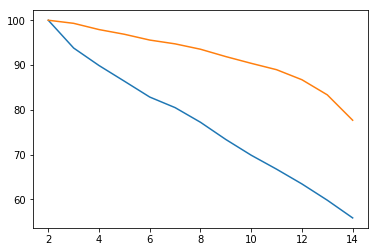

In [144]:
e_f = []
e_t = []
for cut in range(2,15):
    N_fake = np.sum(dR_Ks>0.05)
    N_true = np.sum(dR_Ks<=0.05)

    N_fake_pass = np.sum(dMC['Ks_N_valid_hits'][dR_Ks>0.05] > cut)
    N_true_pass = np.sum(dMC['Ks_N_valid_hits'][dR_Ks<=0.05] > cut)

    e_f.append(100*N_fake_pass/float(N_fake))
    e_t.append(100*N_true_pass/float(N_true))
    
plt.plot(range(2,15), e_f, label='Eff fake')
plt.plot(range(2,15), e_t, label='Eff true')
plt.legend(loc='best')

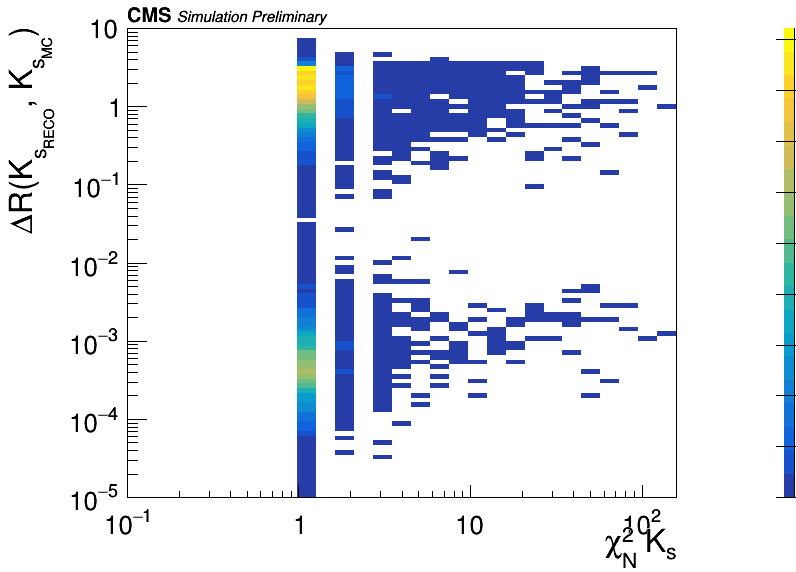

In [149]:
h = create_TH2D(np.column_stack((dMC['Ks_norm_chi2'], dR_Ks)), 
                axis_title=['#chi^{2}_{N} K_{s}', '#DeltaR(K_{s}_{RECO}, K_{s}_{MC})', 'Candidates'],
                binning=[np.logspace(-1, 2.2, 30), np.logspace(-5, 1, 100)]
               )
c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()
c.SetLogy()
c.SetLogx()

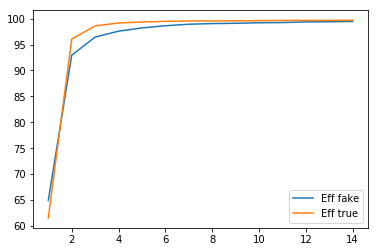

In [153]:
e_f = []
e_t = []
for cut in range(1,15):
    N_fake = np.sum(dR_Ks>0.05)
    N_true = np.sum(dR_Ks<=0.05)

    N_fake_pass = np.sum(dMC['Ks_norm_chi2'][dR_Ks>0.05] < cut)
    N_true_pass = np.sum(dMC['Ks_norm_chi2'][dR_Ks<=0.05] < cut)

    e_f.append(100*N_fake_pass/float(N_fake))
    e_t.append(100*N_true_pass/float(N_true))
    
plt.plot(range(1,15), e_f, label='Eff fake')
plt.plot(range(1,15), e_t, label='Eff true')
plt.legend(loc='best')

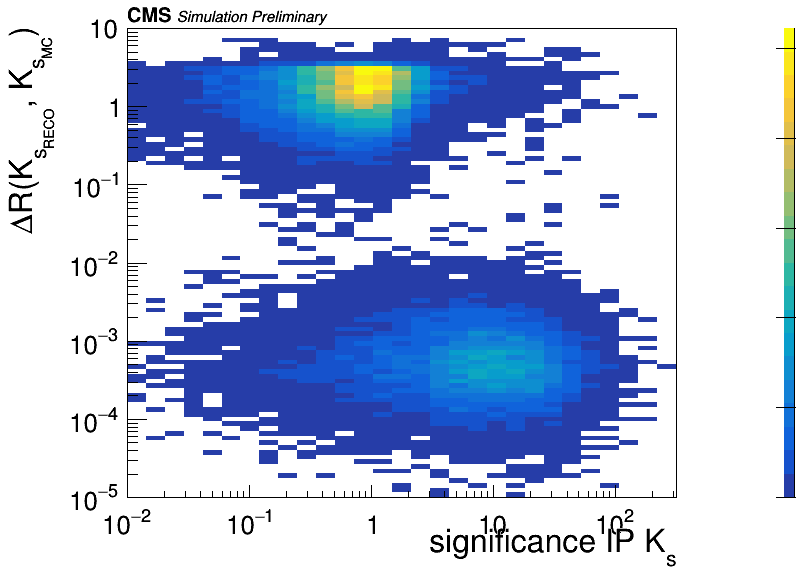

In [155]:
h = create_TH2D(np.column_stack((dMC['sigd_Ks_PV'], dR_Ks)), 
                axis_title=['significance IP K_{s}', '#DeltaR(K_{s}_{RECO}, K_{s}_{MC})', 'Candidates'],
                binning=[np.logspace(-2, 2.5, 30), np.logspace(-5, 1, 100)]
               )
c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()
c.SetLogy()
c.SetLogx()

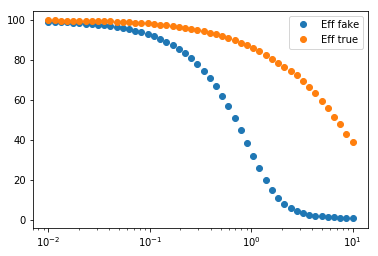

In [160]:
e_f = []
e_t = []
cuts = np.logspace(-2,1)
for cut in cuts:
    N_fake = np.sum(dR_Ks>0.05)
    N_true = np.sum(dR_Ks<=0.05)

    N_fake_pass = np.sum(dMC['sigd_Ks_PV'][dR_Ks>0.05] > cut)
    N_true_pass = np.sum(dMC['sigd_Ks_PV'][dR_Ks<=0.05] > cut)

    e_f.append(100*N_fake_pass/float(N_fake))
    e_t.append(100*N_true_pass/float(N_true))
    
plt.plot(cuts, e_f, 'o', label='Eff fake')
plt.plot(cuts, e_t, 'o', label='Eff true')
plt.legend(loc='best')
plt.xscale('log')

Eff fake 2.2%
Eff true 71.9%


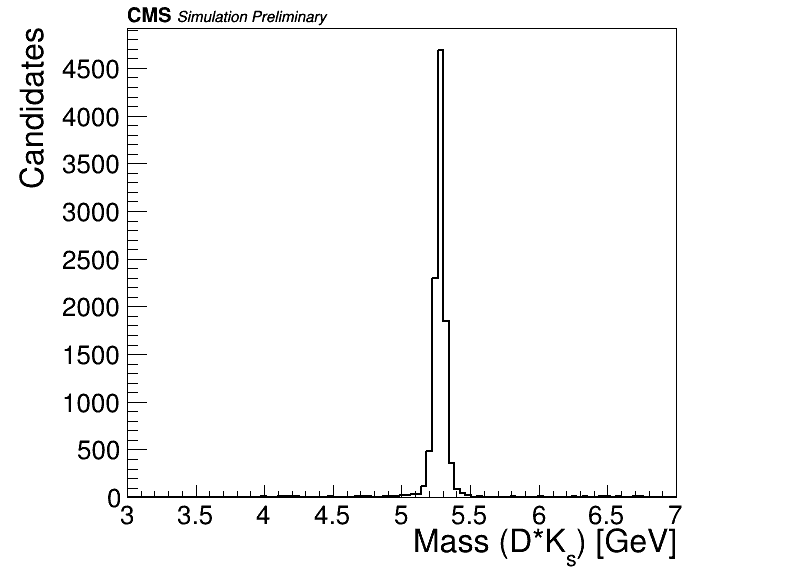

In [167]:
sel = dMC['sigd_Ks_PV'] > 2
sel = np.logical_and(sel, dMC['Ks_N_valid_hits'] > 4)
sel = np.logical_and(sel, dMC['Ks_pt'] > 1.)
sel = np.logical_and(sel, dMC['Ks_norm_chi2'] < 3.)

N_fake = np.sum(dR_Ks>0.05)
N_true = np.sum(dR_Ks<=0.05)

N_fake_pass = np.sum(dR_Ks[sel]>0.05)
N_true_pass = np.sum(dR_Ks[sel]<=0.05)

print 'Eff fake {:.1f}%'.format(100*float(N_fake_pass)/N_fake)
print 'Eff true {:.1f}%'.format(100*float(N_true_pass)/N_true)

h = create_TH1D(dMC['mass_DstKs'][sel], 
                axis_title=['Mass (D*K_{s}) [GeV]', 'Candidates'],
                binning=np.linspace(3,7, 100)
               )

c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()

## PU comparison

In [55]:
h = create_TH1D(dMC['n_B'], name='hPU0',
                title='PU = 0', 
                axis_title=['# B candidates', 'Prob'], 
                binning=[7,-0.5,6.5], 
                opt='overflow')
h.Sumw2()
h.Scale(1./h.Integral())

h_PU = create_TH1D(dMC_PU['n_B'], name='hPU20', title='PU = 20', binning=h.binning, opt='overflow')
h_PU.Sumw2()
h_PU.Scale(1./h_PU.Integral())
h_PU.SetLineColor(2)

c = make_ratio_plot([h, h_PU], ratio_bounds=[0.5, 1.5])
CMS_lumi.CMS_lumi(c, -1, 33)
c.Draw()

NameError: name 'dMC_PU' is not defined

In [ ]:
h = create_TH1D(dMC['mass_DstK'], name='hPU0',
                title='PU = 0', 
                axis_title=['M_{D*K} [GeV]', 'Prob'], 
                binning=[50, 4.5, 6.5], 
                opt='overflow+underflow')
h.Sumw2()
h.Scale(1./h.Integral())

h_PU = create_TH1D(dMC_PU['mass_DstK'], 
                   name='hPU20', 
                   title='PU = 20', 
                   binning=h.binning, 
                   opt='overflow+underflow')
h_PU.Sumw2()
h_PU.Scale(1./h_PU.Integral())
h_PU.SetLineColor(2)

c = make_ratio_plot([h, h_PU], ratio_bounds=[0.5, 1.5])
CMS_lumi.CMS_lumi(c, -1, 33)
c.Draw()

In [ ]:
d = dMC
h = create_TH2D(np.column_stack((d['mass_DstK'], d['chi2_DstK'])), 
                axis_title=['M_{D*K} [GeV]', 'Vtx #chi^{2}', 'Candidates'],
                binning=[100, 3.5, 7, 100, 0, 7]
               )
c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()

In [ ]:
# h = create_TH2D(np.column_stack((d['mass_DstK'], d['cos_DstK_vtxBest'])), 
#                 axis_title=['M_{D*K} [GeV]', 'Pointing', 'Candidates'],
#                 binning=[100, 3.5, 7, 100, 0.95, 1]
#                )
# c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
# c.SetRightMargin(0.15)
# c.Draw()

In [ ]:
dphi = np.repeat(d['MC_Ks_phi'], d['n_B'].astype(np.int))-d['Ks_phi']
dphi = np.where(np.abs(dphi)>np.pi, dphi - np.sign(dphi)*2*np.pi, dphi)
deta = np.repeat(d['MC_Ks_eta'], d['n_B'].astype(np.int))-d['Ks_eta']
dR_Ks = np.hypot(deta, dphi)
h = create_TH2D(np.column_stack((d['mass_DstK'], dR_Ks)), 
                axis_title=['M_{D*K} [GeV]', '#DeltaR(K_{RECO}, K_{MC})', 'Candidates'],
                binning=[np.linspace(3.5, 7, 100), np.logspace(-5, 1, 100)]
               )
c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()
c.SetLogy()

In [ ]:
h = create_TH2D(np.column_stack((d['chi2_DstK'], dR_Ks)), 
                axis_title=['Vtx #chi^{2}', '#DeltaR(K_{RECO}, K_{MC})', 'Candidates'],
                binning=[np.linspace(0, 7, 100), np.logspace(-5, 1, 100)]
               )
c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()
c.SetLogy()

In [ ]:
# h = create_TH2D(np.column_stack((d['cos_DstK_vtxBest'], dR_Ks)), 
#                 axis_title=['Pointing', '#DeltaR(K_{RECO}, K_{MC})', 'Candidates'],
#                 binning=[np.linspace(0.8, 1, 100), np.logspace(-5, 1, 100)]
#                )
# c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
# c.SetRightMargin(0.15)
# c.Draw()
# c.SetLogy()

In [ ]:
h = create_TH2D(np.column_stack((d['Ks_pt'], dR_Ks)), 
                axis_title=['p_{T} K_{RECO} [GeV]', '#DeltaR(K_{RECO}, K_{MC})', 'Candidates'],
                binning=[np.logspace(-0.5, 1.8, 100), np.logspace(-5, 1, 100)]
               )
c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()
c.SetLogy()
c.SetLogx()

In [ ]:
print np.sum(dR_Ks > 0.01)
print np.sum(dR_Ks < 0.01)

In [ ]:
h = create_TH2D(np.column_stack((np.abs(d['Ks_eta']), dR_Ks)), 
                axis_title=['#eta K_{RECO}', '#DeltaR(K_{RECO}, K_{MC})', 'Candidates'],
                binning=[np.linspace(0, 4, 100), np.logspace(-5, 1, 100)]
               )
c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()
c.SetLogy()
# c.SetLogx()

In [ ]:
# dphi = d['Dst_phi'] - d['Ks_phi']
# dphi = np.where(np.abs(dphi)>np.pi, dphi - np.sign(dphi)*2*np.pi, dphi)
# deta = d['Dst_eta'] - d['Ks_eta']
# dR_Ks_Dst = np.hypot(deta, dphi)
# h = create_TH2D(np.column_stack((dR_Ks_Dst, dR_Ks)), 
#                 axis_title=['#DeltaR(K_{RECO}, D*_{RECO})', '#DeltaR(K_{RECO}, K_{MC})', 'Candidates'],
#                 binning=[np.logspace(-1.5, 1, 100), np.logspace(-5, 1, 100)]
#                )
# c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
# c.SetRightMargin(0.15)
# c.Draw()
# c.SetLogy()
# c.SetLogx()

In [ ]:
dphi = np.repeat(d['trgMu_phi'], d['n_B'].astype(np.int))-d['Ks_phi']
dphi = np.where(np.abs(dphi)>np.pi, dphi - np.sign(dphi)*2*np.pi, dphi)
deta = np.repeat(d['trgMu_eta'], d['n_B'].astype(np.int))-d['Ks_eta']
dR_Ks_mu = np.hypot(deta, dphi)
h = create_TH2D(np.column_stack((dR_Ks_mu, dR_Ks)), 
                axis_title=['#DeltaR(K_{RECO}, #mu_{trg})', '#DeltaR(K_{RECO}, K_{MC})', 'Candidates'],
                binning=[np.logspace(-1.5, 1, 100), np.logspace(-5, 1, 100)]
               )
c = drawOnCMSCanvas(CMS_lumi, [h], ['colz'])
c.SetRightMargin(0.15)
c.Draw()
c.SetLogy()
c.SetLogx()